# Importando as bibiotecas
neste notebook iremos criar dashboard usando python e aplicaremos o Data Sciente

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv('./Dados_Imersão.csv') #importando a plhanilha do dados .csv
avaliacoes = pd.read_csv('./Avaliacoes_imersao.csv') #importando a planilha de avaliacoes .csv

#### dados.head()
pega a variavel que contem o csv e imprime os primeiros 5 itens, caso coloque numeros dentro do .heade(10) exbirá a quantidade de itens selecionada

In [4]:
dados.head(2) #vem na forma de coluna

,product_id,product_name,category,category_geral,subcategory,actual_price,product_price,percent,actual_price_real,rating,rating_count,about_product,product_link,titulo,review
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,"₹399,00","₹1.099,00","63,69%","R$ 23,96","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,"₹199,00","₹349,00","42,98%","R$ 11,95",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,NaN,NaN


#### dados.info()
tras as informações das colunas presentes no nosso csv, podemos ver o tipo das colunas para entender o que transformar

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         1465 non-null   object
 1   product_name       1465 non-null   object
 2   category           1465 non-null   object
 3   category_geral     1030 non-null   object
 4   subcategory        1030 non-null   object
 5   actual_price       1465 non-null   object
 6   product_price      1465 non-null   object
 7   percent            1465 non-null   object
 8   actual_price_real  1465 non-null   object
 9   rating             1465 non-null   object
 10  rating_count       1465 non-null   int64 
 11  about_product      1465 non-null   object
 12  product_link       1465 non-null   object
 13  titulo             1030 non-null   object
 14  review             1030 non-null   object
dtypes: int64(1), object(14)
memory usage: 171.8+ KB


In [6]:
dados.describe()

,rating_count
count,1.465000e+03
mean,2.166947e+04
std,9.132905e+04
min,0.000000e+00
25%,9.100000e+02
50%,4.003000e+03
75%,1.466700e+04
max,2.051952e+06


### Fazendo a limpeza de dados
antes da normalização de dados e analises

In [7]:
#este comando pega a coluna actual_price e troca a virgula
dados['actual_price'] = dados['actual_price'].str.replace('.', '')

In [8]:
#este comando pega a coluna actual_price e troca a virgula
dados['actual_price'] = dados['actual_price'].str.replace(',', '.')

In [9]:
#este comando pega a coluna actual_price e troca o simbolo da Rupia ₹
dados['actual_price'] = dados['actual_price'].str.replace('₹', '')

# Converte a coluna que tinha o tipo 'text' para o tipo 'numérico' -  (opcional)
dados['actual_price'] = pd.to_numeric(dados['actual_price'])

#exibe novamente os primeiros registros
dados.head(2)

,product_id,product_name,category,category_geral,subcategory,actual_price,product_price,percent,actual_price_real,rating,rating_count,about_product,product_link,titulo,review
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,"₹1.099,00","63,69%","R$ 23,96","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,199.0,"₹349,00","42,98%","R$ 11,95",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,NaN,NaN


In [10]:
#este comando pega a coluna product_price
dados['product_price'] = dados['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')

# Converte tipo 'text' para o tipo 'numérico' 
dados['product_price'] = pd.to_numeric(dados['product_price'])
dados.head(2)

,product_id,product_name,category,category_geral,subcategory,actual_price,product_price,percent,actual_price_real,rating,rating_count,about_product,product_link,titulo,review
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,"63,69%","R$ 23,96","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,199.0,349.0,"42,98%","R$ 11,95",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,NaN,NaN


#### planilha[['coluna','coluna']].head()
lembrando que para mostrar apenas as colunas selecionadas para melhorar a visibilidade

In [11]:
dados['rating'] = dados['rating'].str.replace(',', '.')
dados[['actual_price','product_price','rating']].head(2)

,actual_price,product_price,rating
0,399.0,1099.0,4.5
1,199.0,349.0,4


In [12]:
dados['rating'] = pd.to_numeric(dados['rating'])

In [13]:
dados.describe() # lista os itens e mostra uma tabela

,actual_price,product_price,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1.465000e+03
mean,3077.617693,5365.248840,4.432198,2.166947e+04
std,6860.277463,10743.796284,0.226138,9.132905e+04
min,2.500000,38.000000,0.000000,0.000000e+00
25%,314.000000,800.000000,4.490000,9.100000e+02
50%,799.000000,1645.000000,4.500000,4.003000e+03
75%,1999.000000,4199.000000,4.510000,1.466700e+04
max,77990.000000,139900.000000,5.000000,2.051952e+06


## Gráficos

In [14]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The explicit object-oriented API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API </api/axes_api>` for the plotting methods on an Axes::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.

c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


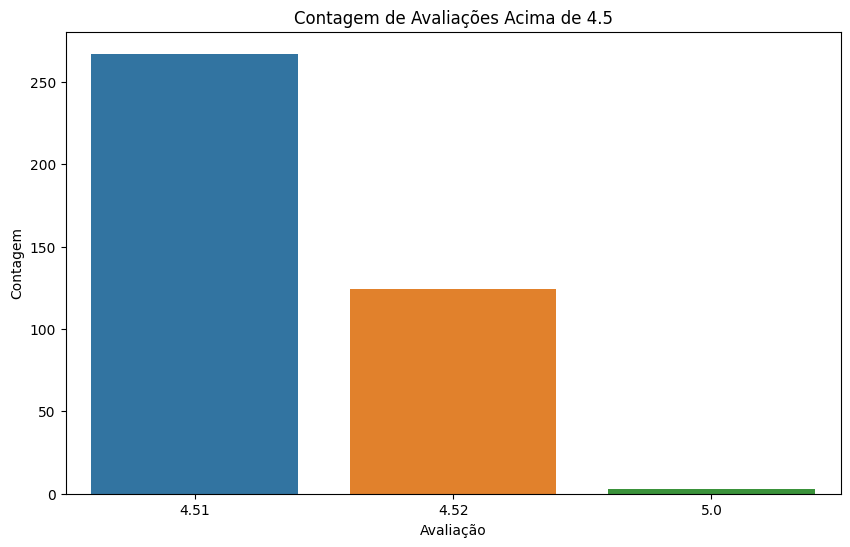

In [15]:
rating_above_4_5 = dados[dados['rating'] > 4.5]
rating_cont = rating_above_4_5['rating'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=rating_cont.index, y=rating_cont.values)
plt.title('Contagem de Avaliações Acima de 4.5')
plt.xlabel('Avaliação')
plt.ylabel('Contagem')
plt.show()

### Gráfico em pizzas

In [16]:
#define o limite de cada variavel
faixa1 = dados[dados['actual_price'] <=50]
faixa2 = dados[(dados['actual_price'] > 50)& (dados['actual_price'] <=500)]
faixa3 = dados[dados['actual_price'] >500]

# contagem de produto em cada faixa de valor
cont_f1 = len(faixa1)
cont_f2 = len(faixa2)
cont_f3 = len(faixa3)

#prepara os dados para os graficos de pizza
contagens = [cont_f1, cont_f2, cont_f3]
faixas = ['até 50' , 'Entre 50 e 500', 'acima de 500'] 
emplode = (0.1,0 ,0) # Destaca o maior valor

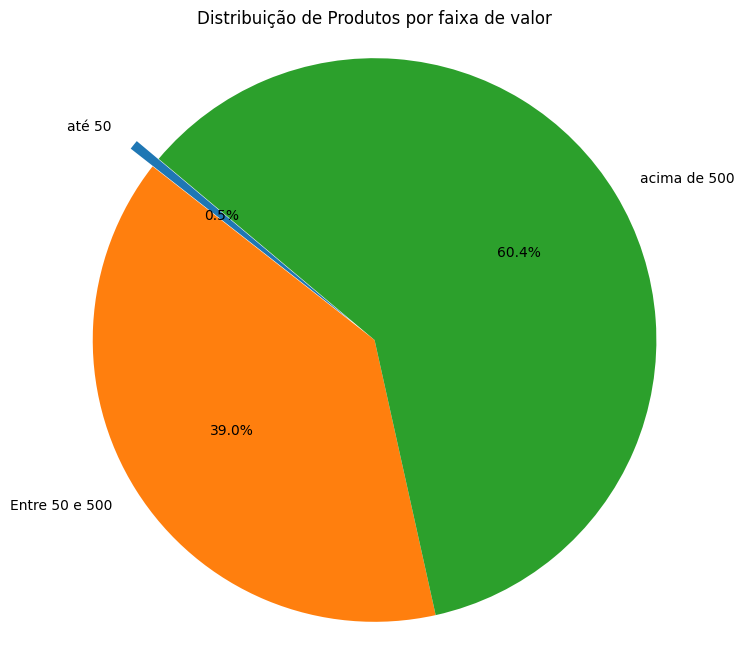

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(contagens, labels=faixas, autopct='%1.1f%%', startangle=140, explode=emplode)
plt.title('Distribuição de Produtos por faixa de valor')
plt.axis('equal') #deixa o aspecto do grafico redondo
plt.show()

### Mais sobre o pandas
[documentação do pandas](https://pandas.pydata.org/docs/user_guide/index.html)